# King County House Price Model

<img src="images/for-sale-sign.png" />

## Overview
---
This project analyzes housing information drawn from the King County area from May 2014 to May 2015 in order to help future home owners intuitively determine an estimated price to expect for property in the area. After the data were cleaned and encoded, various iterative multiple linear regressions were run in order to converge on a model to use for the house price inference. It was found that the price of a given home in King County could be accurately modeled and inferred, given a minimal amount of data both intuitive to the buyer and important to the pricing of a home. 

## Business Problem
---
The year is 2015, and you have finally decided that it is time to get out of your current home and relocate to or within the Seattle area. As you sprawl through the internet, you notice that there is quite a variety of homes and prices to choose from. While excited by the prospect of moving, you quickly realize that this is not going to be nearly as pain-free as putting your things in somes boxes and going: How many rooms do you want? Do you want an ample amount of space, or are you okay with cutting back some? What's your price range? <i>How do you know you're not paying too much?</i>

Voila. This model was created to find an estimate for what to expect for house price by inputting criteria of interest in order to help people in the home buyers' market avoid unrealistically high prices (and conversely, capitalize on unrealistically low prices). <b>With the power of big data, prospective home buyers in King County can know what price to expect to pay for a property of interest, and as a result can better assess and negotiate for a fair price.</b> Ultimately, we seek to level the playing field by offering to individual consumers data once only available to large real estate companies in a simple yet powerful approach. 

Our research indicates that some of the most determining metrics for the price of a home include location, property square footage, lot square footage, number of bedrooms, and number of bathrooms. [CITATION] Further, these are also among the most important criteria home buyers consider when making a purchase. [CITATION]. As a result, we are able to both accurately and intuitively model home prices in the greater Seattle Metro Area for prospective buyers, saving time and stress in the high-pressure home-buying process, <i>from ideation to congratulations.</i> 

## Data Understanding
---
For this project, we used a dataset containing roughly 25,000 data points on property sales in King County between May 2014 and May 2015.

In [3]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load dataset into notebook
df = pd.read_csv('data/kc_house_data.csv')

In [5]:
# preview dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
# preview dataset columnar information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

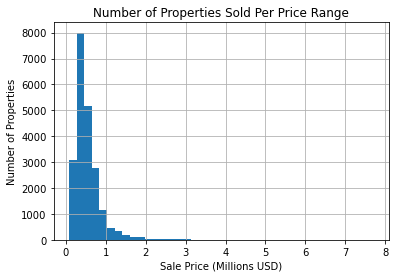

In [7]:
# visualize home price data
ax1 = plt.axes()
(df['price']*(1/1000000)).hist(bins=40);
plt.ylabel('Number of Properties');
plt.xlabel('Sale Price (Millions USD)');
plt.title('Number of Properties Sold Per Price Range');
ax1.ticklabel_format(style='plain')
plt.show()

In [8]:
# add more data exploration plots here ???

## Data Preparation
---

### Bad Data

- One data point listed a property as having 33 rooms with only 1620 square feet. We have determined that this is not possible.
- Eight data points where the living space did make make sense compared to the lot space and the number of floors. Living space is the total square footage of the property, there is no physically possible (or legal, at least) way to exceed lot size in a single floor of a property. Therefore, no property should have more sqft_living space than (floors) * (sqft_lot).

In [9]:
df.iloc[15856]

id               2402100895
date              6/25/2014
price                640000
bedrooms                 33
bathrooms              1.75
sqft_living            1620
sqft_lot               6000
floors                    1
waterfront               NO
view                   NONE
condition         Very Good
grade             7 Average
sqft_above             1040
sqft_basement         580.0
yr_built               1947
yr_renovated              0
zipcode               98103
lat                 47.6878
long               -122.331
sqft_living15          1330
sqft_lot15             4700
Name: 15856, dtype: object

In [10]:
df = df.drop(15856, axis=0)

In [11]:
df[(df['sqft_lot'] * df['floors']) < (df['sqft_living'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1547,8816400885,10/8/2014,450000.0,4,1.75,1640,1480,1.0,NO,NONE,...,7 Average,820,820.0,1912,0.0,98105,47.6684,-122.314,1420,2342
3449,2559950110,4/22/2015,1230000.0,2,2.50,2470,609,3.0,NO,NONE,...,11 Excellent,1910,560.0,2011,0.0,98112,47.6182,-122.312,2440,1229
5795,2770604103,7/31/2014,450000.0,3,2.50,1530,762,2.0,NO,NONE,...,8 Good,1050,480.0,2007,0.0,98119,47.6420,-122.374,1610,1482
13240,2877104196,12/6/2014,760000.0,3,2.00,1780,1750,1.0,NO,AVERAGE,...,8 Good,1400,380.0,1927,2014.0,98103,47.6797,-122.357,1780,3750
13265,3277800845,7/11/2014,370000.0,3,1.00,1170,1105,1.0,NaN,NONE,...,7 Average,1170,0.0,1965,0.0,98126,47.5448,-122.375,1380,1399
15729,9828702895,10/22/2014,700000.0,4,1.75,2420,520,1.5,NO,NONE,...,7 Average,2420,0.0,1900,0.0,98112,47.6209,-122.302,1200,1170
16917,5016002275,6/2/2014,610000.0,5,2.50,3990,3839,1.0,NaN,NONE,...,8 Good,1990,2000.0,1962,0.0,98112,47.6236,-122.299,2090,5000
17420,2062600020,7/8/2014,530000.0,2,2.50,1785,779,2.0,NO,NONE,...,7 Average,1595,190.0,1975,0.0,98004,47.5959,-122.198,1780,794


In [12]:
idx = df[(df['sqft_lot']) < (df['sqft_living'] / df['floors'])].index
df = df.drop(idx, axis=0)

### Unhelpful data

We dropped the colunms that, based on research, were determined to have little influence on property price, and are unintuitive to home buyers.

In [13]:
# drop 'id' column because it is not relevant to price inference
# columns we are using sqft living, bed, bath, zipcode
df = df.drop('id', axis=1)
df = df.drop('date', axis=1)
df = df.drop('floors', axis=1)
df = df.drop('waterfront', axis=1)
df = df.drop('view', axis=1)
df = df.drop('condition', axis=1)
df = df.drop('grade', axis=1)
#df = df.drop('yr_renovated', axis=1)
df = df.drop(['lat','long'], axis=1)
#df = df.drop('yr_built', axis=1)
df = df.drop('sqft_basement', axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21588 non-null  float64
 1   bedrooms       21588 non-null  int64  
 2   bathrooms      21588 non-null  float64
 3   sqft_living    21588 non-null  int64  
 4   sqft_lot       21588 non-null  int64  
 5   sqft_above     21588 non-null  int64  
 6   zipcode        21588 non-null  int64  
 7   sqft_living15  21588 non-null  int64  
 8   sqft_lot15     21588 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.6 MB


### Data Transformations

Change zipcodes to classification system: Urban, Suburban, Rural; then OneHot encode them.

In [15]:
zip_class = {
            98002 : 'Urban', 98092 : 'Urban', 98178: 'Urban', 98125: 'Urban', 98028:'Suburban',
            98136: 'Urban', 98074: 'Suburban', 98053: 'Urban', 98003: 'Urban',
            98198: 'Suburban', 98146: 'Urban', 98038: 'Suburban', 98007:'Urban', 98115:'Urban',
            98107:'Urban', 98126:'Urban', 98019:'Rural', 98103:'Urban', 98133:'Urban', 98030: 'Urban',
            98119:'Urban', 98112:'Urban', 98052:'Urban', 98027:'Suburban', 98117:'Urban', 98058:'Urban',
            98001:'Urban', 98056:'Urban', 98166:'Urban', 98023:'Urban', 98070:'Rural',
            98148:'Urban', 98105:'Urban', 98042:'Suburban', 98008:'Urban', 98059:'Urban', 98122:'Urban',
            98144:'Urban', 98004:'Urban', 98005:'Urban', 98034:'Urban', 98075:'Suburban',98116:'Urban',
            98010:'Rural', 98118:'Urban', 98199:'Urban', 98040:'Suburban', 98032:'Urban',
            98045:'Rural', 98102:'Urban', 98077:'Rural', 98108:'Urban', 98168:'Urban',
            98177:'Suburban', 98065:'Rural', 98029:'Suburban', 98006:'Urban', 98109:'Urban', 98022:'Rural',
            98033:'Urban', 98155:'Suburban', 98024:'Rural', 98011:'Urban', 98031:'Urban',
            98106:'Urban', 98072:'Suburban', 98188:'Urban', 98014:'Rural', 98055:'Urban', 98039:'Suburban'
            }


In [17]:
df['zipcode'] = df['zipcode'].replace(zip_class)

In [18]:
city_dummies = pd.get_dummies(df['zipcode'], drop_first=True)
df = pd.concat([df, city_dummies], axis=1)
df = df.drop('zipcode', axis=1)

In [21]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,class_Suburban,class_Urban
0,221900.0,3,1.00,1180,5650,1180,1340,5650,0,1
1,538000.0,3,2.25,2570,7242,2170,1690,7639,0,1
2,180000.0,2,1.00,770,10000,770,2720,8062,1,0
3,604000.0,4,3.00,1960,5000,1050,1360,5000,0,1
4,510000.0,3,2.00,1680,8080,1680,1800,7503,1,0


## First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model!

At this point, you can also consider what a baseline, model-less prediction might look like, and begin evaluating this model compared to that baseline.

In [ ]:
# code here for your first 'substandard' model

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze or model the data?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

In [ ]:
# code here to do your second, more refined model

In [ ]:
# code here to iteratively improve your models

## Evaluation

Evaluate how well your work solves the stated business problem.

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model?
- How well does your model/data fit any modeling assumptions?
- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

Please note - you should be evaluating each model as you move through, and be sure to evaluate your models consistently.

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error
from scipy import stats

def model_maker(X, y):
    #Gets figures ready for plotting
    fig, axes = plt.subplots(nrows = 2, figsize = (12,12))
    
    #Splits data in testing and training for evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    
    #ADD BACK IN IF NEED, SHOULD DO BEFORE CALLING
#     Tests for Linearity/Multicollinearity
#     print('Testing for Linearity and Multicollinearity')
#     combine = pd.concat([X, y], axis = 1)
#     sns.heatmap(abs(combine.corr()), annot = True)
#     plt.show()
    
    #Makes model
    X_const = sm.add_constant(X_train)
    linreg_model = sm.OLS(y_train, X_train).fit()
    
    #Grabs predictions
    train_predict = linreg_model.predict(X_train)
    test_predict = linreg_model.predict(X_test)
    
    #Prints R^2
    print("Model R2: " + str(linreg_model.rsquared_adj))
    
    #Prints MSE
    print("Train MSE: " + str(mean_squared_error(y_train, train_predict)))
    print("Test MSE: " + str(mean_squared_error(y_test, test_predict)))
    
    #Creates residuals
    train_resid = y_train - train_predict
    test_resid = y_test - test_predict
    
    #Test for normality
    print('Test for Normality')
    sm.qqplot(train_resid, line = 'r', ax = axes[0])
    #Also check JB value in model summary (<6)
    
    #Test for Heteroskedasticity
    plt.scatter(train_predict, train_resid, label = 'Train')
    plt.scatter(test_predict, test_resid, label='Test')
    plt.axhline(y=0, color = 'red')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()
     
    return linreg_model

## References

https://www.fortunebuilders.com/what-are-the-biggest-factors-in-determining-property-value/
    
    
https://www.mymove.com/buying-selling/guides/most-important-factors-for-buying-your-dream-home/
